In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.style.use("seaborn-v0_8")

In [3]:
df = pd.read_csv("post_data.csv", index_col=0)

In [4]:
df["post_date"] = pd.to_datetime(df["post_date"])

In [5]:
df

,post_date,attachment_type,text_size,like_count,comment_count,repost_count,view_count,duration
post_id,,,,,,,,
1,2024-09-20 17:21:29,photo,47,1084,78,25,55656,NaN
2,2024-09-19 22:37:34,video,20,2682,34,196,143470,84.0
3,2024-09-16 21:08:24,photo,473,1380,74,11,88119,NaN
4,2024-09-16 19:29:40,video,13,362,61,47,36877,5.0
5,2024-09-15 11:30:20,photo,235,1658,84,35,177523,NaN
...,...,...,...,...,...,...,...,...
546,2017-03-28 01:16:46,video,73,727,53,60,71396,573.0
547,2017-03-24 23:22:29,video,58,728,43,72,42699,0.0
548,2017-03-22 21:11:04,video,67,249,6,9,37010,0.0


In [6]:
df["attachment_type"] = df["attachment_type"].apply(lambda x: x if x in ("photo", "video", "repost") else "other")

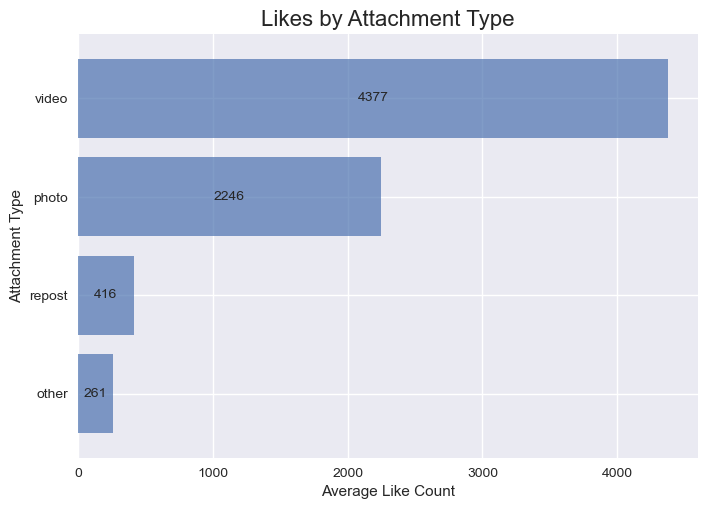

In [7]:
fig, ax = plt.subplots()

my_plot = df.groupby("attachment_type")["like_count"].mean().sort_values().plot(kind="barh", width=0.8, alpha=0.7)
ax.bar_label(my_plot.containers[0], label_type="center", fmt=lambda x: round(x))

ax.set_title("Likes by Attachment Type", size=16)
ax.set_xlabel("Average Like Count")
ax.set_ylabel("Attachment Type")

# plt.savefig("/Users/nikitababurin/Downloads/likes_by_type.png")
plt.show()

In [8]:
corr_data = df.select_dtypes(np.number).corr()

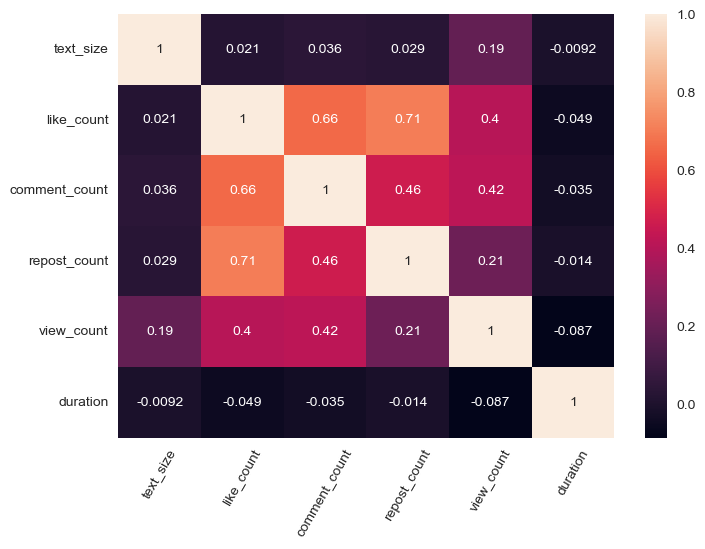

In [9]:
sns.heatmap(
    corr_data,
    annot=True
)

plt.xticks(rotation=60)
plt.show()

In [10]:
corr_data[["like_count"]].sort_values(by="like_count", ascending=False).iloc[1:, :].round(3)

,like_count
repost_count,0.705
comment_count,0.659
view_count,0.404
text_size,0.021
duration,-0.049


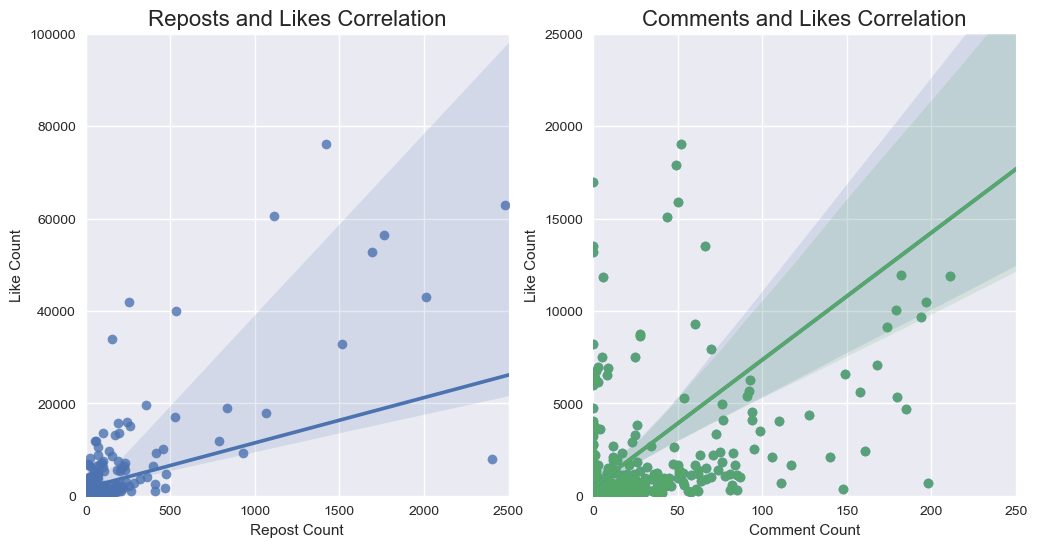

In [11]:
fix, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

sns.regplot(df, x="comment_count", y="like_count", ax=ax[1])

for n, x_value in enumerate(["repost_count", "comment_count"]):
    sns.regplot(df, x=x_value, y="like_count", ax=ax[n])
    x_value = tuple(map(lambda x: x.capitalize(), x_value.split("_")))
    ax[n].set_xlabel(" ".join(x_value))
    ax[n].set_ylabel("Like Count")
    ax[n].set_title(f"{x_value[0]}s and Likes Correlation", size=16)

ax[0].set_xlim(0, 2500)
ax[0].set_ylim(0, 100000)
ax[1].set_xlim(0, 250)
ax[1].set_ylim(0, 25000)

# plt.savefig("/Users/nikitababurin/Downloads/corr.png")
plt.show()